# Основы статистики

Импорт модулей

In [1]:
import pandas as pd

## Введение

Обычно, размер исследуемых объектов(генеральная совокупность) слишком велик, поэтому исследователь отбирает часть данных(формирует выборку), которая должна быть моделью, отражать природу и  свойства (репрезентативная выборка) исследуемого набора данных. Затем исследователь обощает результаты на всю генеральную совокупность. 

### 1.2 Генеральная совокупность и выборка.

**Генеральная совокупность**\
множество всех объектов, относительно которых будем делать выводы в рамках исследования некоторой научной проблемы. (множество всех объектов на которые мы хотели бы обобщить исследование)

**Выборка**\
это метод исследования, когда из общей изучаемой (генреральной) совокупности однородных единиц отбирается некоторая её часть (выборочная совокупность) и только эта часть подвергается обследованию.

**Репрезентативная выборка**\
это часть целевой аудитории, которая отражает ключевые характеристики всей совокупности пользователей (пол, возраст, местоположение, интересы).\
Выборка считается репрезентативной, когда по выбранной маленькой группе можно судить о более широкой аудитории. То есть когда свойства, присущие выбранной из целевой аудитории группы, можно распространить на всю целевую аудиторию. \
Допустимая погрешность при расчёте репрезентативной выборки варьируется в пределах 1-5%.


#### Способы формирования выборок

**Простая случайная выборка(simple random sample)**\
Чтобы её сформировать мы случайным образом начинаем выбирать элементы генеральной совокупности для участия в нашем эксперименте или исследовании (репрезентативная)

In [2]:
# Load a sample dataframe
df = pd.read_csv('data/digital_marketing_campaign_dataset.csv')

# Select 10 random rows
sample_df = df.sample(frac=0.1) # or n = 10

sample_df.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
5457,13457,39,Female,149057,SEO,Conversion,1455.841523,0.037084,0.035489,35,8.846439,8.629744,23,12,4,0,4810,IsConfid,ToolConfid,1
77,8077,51,Female,96521,Email,Awareness,8482.440111,0.036428,0.177663,12,1.303525,6.855999,79,7,1,3,1964,IsConfid,ToolConfid,1
7566,15566,25,Male,107193,Email,Awareness,8036.718288,0.101534,0.016722,41,3.636009,2.556657,7,18,7,5,2569,IsConfid,ToolConfid,0
4475,12475,55,Male,32427,SEO,Consideration,4983.696200,0.155834,0.184303,6,9.225635,8.823962,35,7,2,3,3357,IsConfid,ToolConfid,1
6897,14897,60,Female,69240,Referral,Awareness,4033.839693,0.202125,0.198812,40,4.605869,4.691366,21,0,2,2,108,IsConfid,ToolConfid,0


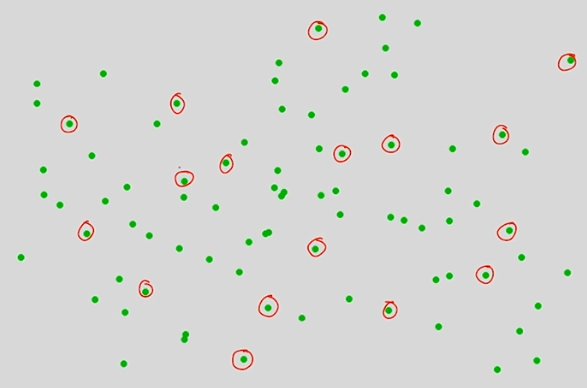

**Стратифицированная выборка**\
Перед тем, как случайным образом извлекать элементы генеральной совокупности для нашего исследования, мы сначала разобъем генеральную совокупность на несколько обособленных и различных по своей природе групп(страт)

In [3]:
df_male = df.loc[df['Gender'] == 'Male', :]\
            .sample(n=5)
df_female = df.loc[df['Gender'] == 'Female', :]\
            .sample(n=5)

In [4]:
frames = [df_male, df_female]
sample_df2 = pd.concat(frames)
sample_df2

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
5756,13756,57,Male,124041,PPC,Conversion,2767.651709,0.153908,0.134589,39,8.752153,13.962640,32,5,4,0,959,IsConfid,ToolConfid,1
4555,12555,41,Male,32056,SEO,Conversion,4521.849162,0.043194,0.090641,49,2.289822,8.233791,79,18,8,6,3246,IsConfid,ToolConfid,1
7461,15461,51,Male,56232,SEO,Consideration,2313.642251,0.231786,0.129731,49,6.191447,7.006794,58,17,4,0,898,IsConfid,ToolConfid,1
4260,12260,61,Male,68073,Referral,Awareness,2849.724867,0.078527,0.169539,22,7.470339,6.076136,76,15,5,4,705,IsConfid,ToolConfid,1
6760,14760,69,Male,130233,SEO,Consideration,8981.159875,0.033297,0.050904,15,8.229179,7.890614,77,3,1,5,4297,IsConfid,ToolConfid,1
4171,12171,27,Female,122955,SEO,Retention,3521.031653,0.257126,0.185605,3,4.283281,4.954172,79,15,0,1,4435,IsConfid,ToolConfid,0
3199,11199,43,Female,58101,SEO,Consideration,1664.680968,0.116798,0.188569,41,8.071529,1.651101,71,19,3,7,1182,IsConfid,ToolConfid,1
6762,14762,62,Female,46013,Email,Conversion,6896.542641,0.166986,0.020678,4,2.047647,5.980637,51,0,6,1,4828,IsConfid,ToolConfid,1
6464,14464,32,Female,68469,Email,Conversion,6824.759388,0.268014,0.068278,33,3.186465,12.267559,47,8,0,8,951,IsConfid,ToolConfid,1
91,8091,35,Female,47256,Referral,Consideration,1184.223170,0.070401,0.089275,11,5.160066,1.741069,29,3,8,6,1288,IsConfid,ToolConfid,1


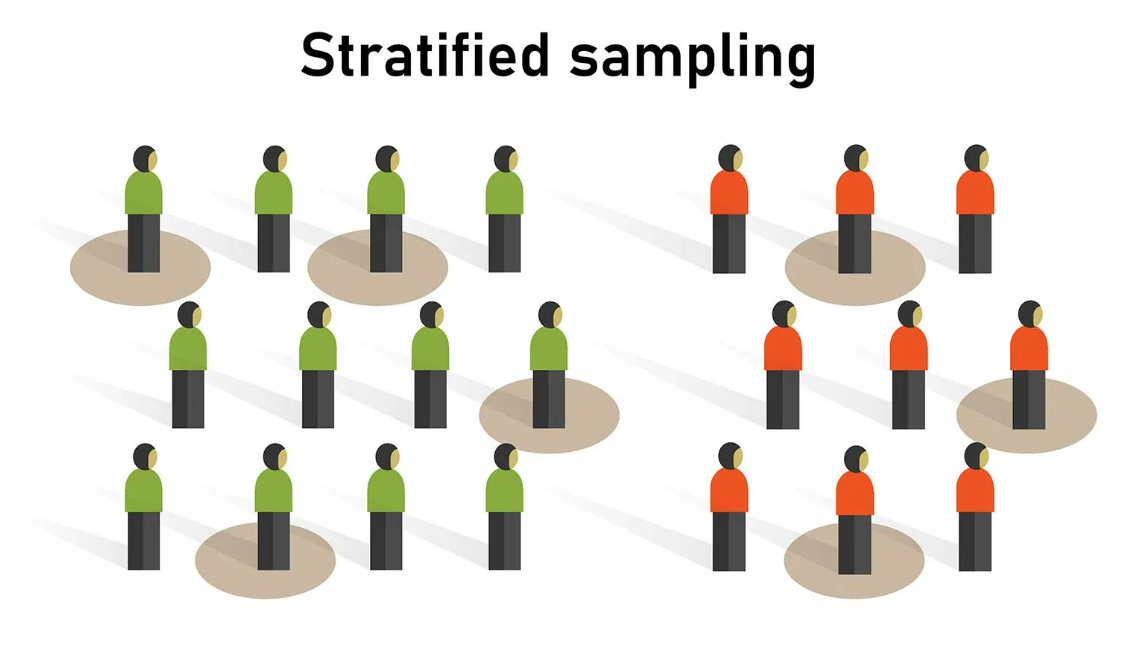

**Групповая выборка(claster sample)**\
Генеральная совокупность разделяется на несколько групп(кластеров), однако в данном случае все кластеры, напротив будут очень сильно похожи между собой. Способ используется для экономии ресурсов и времени при формировании выборки. Пример: делим Санкт-Петербург на несколько географических районов и можем быть уверены в том, что население данных районов сильно не оличается друг от друга. Затем отбираем несколько кластеров и методом случайной выборки формируем из них набор элементов для исследования.

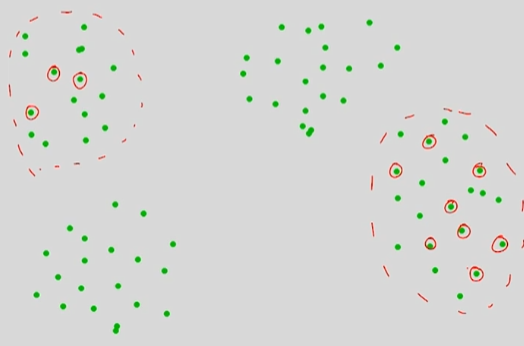

In [5]:
gr_select = df.loc[df['CampaignType'] == 'Consideration']

Разбиение на кластеры

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
cluster_1, cluster_2 = train_test_split(gr_select, test_size=0.5, train_size=0.5,
                 random_state=235)

In [8]:
cluster_1, cluster_2, cluster_3, cluster_4 = train_test_split(
    cluster_1, cluster_2,
    test_size=0.5,
    train_size=0.5,
    random_state=235)


In [9]:
for el in [cluster_1, cluster_2, cluster_3, cluster_4]:
    print(el.shape[0], end=' ')

497 497 497 497 

In [10]:
cluster_1 = cluster_1.sample(10)
cluster_4 = cluster_4.sample(10)

In [11]:
cluster_1.shape, cluster_2.shape

((10, 20), (497, 20))

---

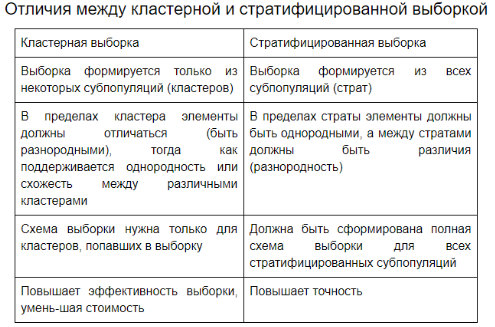

### 1.3. Типы переменных. Количественные и номинативные переменные

|Типы переменных|Подтипы|Описание|Пример|
|:---|:---:|:---|:---|
| Количественные | | Измеренное значение некоторого признака | Рост |
| | непрерывные | Может принимать любое значение на промежутке | Рост может принимать любое значение на промежутке от 160 до 190 см |
| | дискретные | Может принимать только определённые значения | число детей в семье: 1, 2, 3. А 3,5 ребёнка быть не может |
|  | | | |
| Номинативные | | Нужны для разделения испытуемых на группы. За номинативными переменными не стоит никакого математического смысла (классификация). Цифры - это имена групп | Все участники женского пола обозначены цифрой 1, а мужского 2 (1 - ж, 2 - м) |